Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


/Users/ebirieren/miniforge3/envs/tf_cpu/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/ebirieren/miniforge3/envs/tf_cpu/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8950 - auc: 0.9595 - loss: 0.2589 - val_accuracy: 0.9781 - val_auc: 0.9816 - val_loss: 0.1214
Epoch 2/10
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9359 - auc: 0.9779 - loss: 0.1739 - val_accuracy: 0.9743 - val_auc: 0.9866 - val_loss: 0.1281
Epoch 3/10
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9362 - auc: 0.9800 - loss: 0.1680 - val_accuracy: 0.9786 - val_auc: 0.9846 - val_loss: 0.1292
Epoch 4/10
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9349 - auc: 0.9797 - loss: 0.1708 - val_accuracy: 0.9736 - val_auc: 0.9867 - val_loss: 0.1242
Epoch 5/10
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9341 - auc: 0.9783 - loss: 0.1769 - val_accuracy: 0.9775 - val_auc: 0.9768 - val_loss: 0.1058
Epoch 6/10
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9322 - auc: 0.9762 - loss: 0.1898 - val_accuracy: 0.9766 - val_auc: 0.9840 - val_loss: 0.1135
Epoch 7/10
1777/

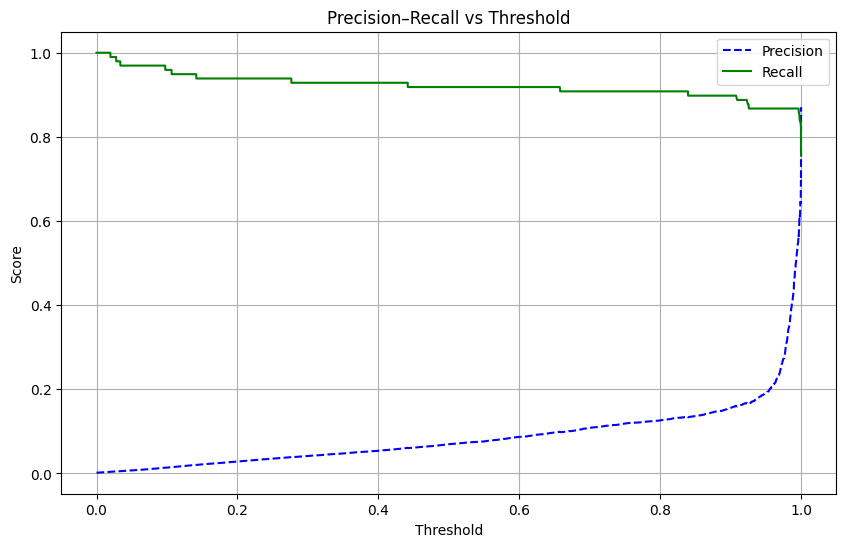


Confusion Matrix:
[[56853    11]
 [   24    74]]

Evaluation Metrics:
Accuracy: 0.999385555282469
Precision: 0.8705882352941177
Recall: 0.7551020408163265
F1-score: 0.8087431693989071
ROC-AUC: 0.9844680433371998

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.76      0.81        98

    accuracy                           1.00     56962
   macro avg       0.94      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



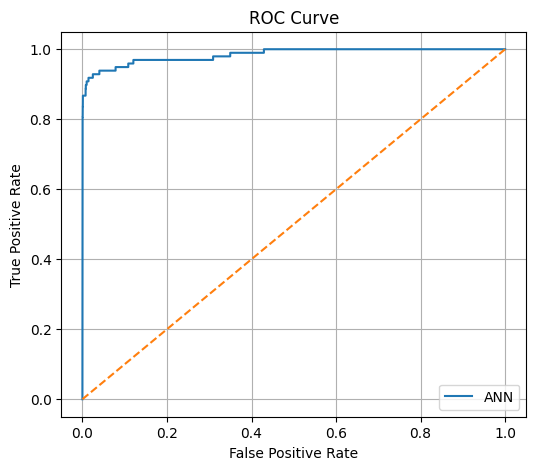

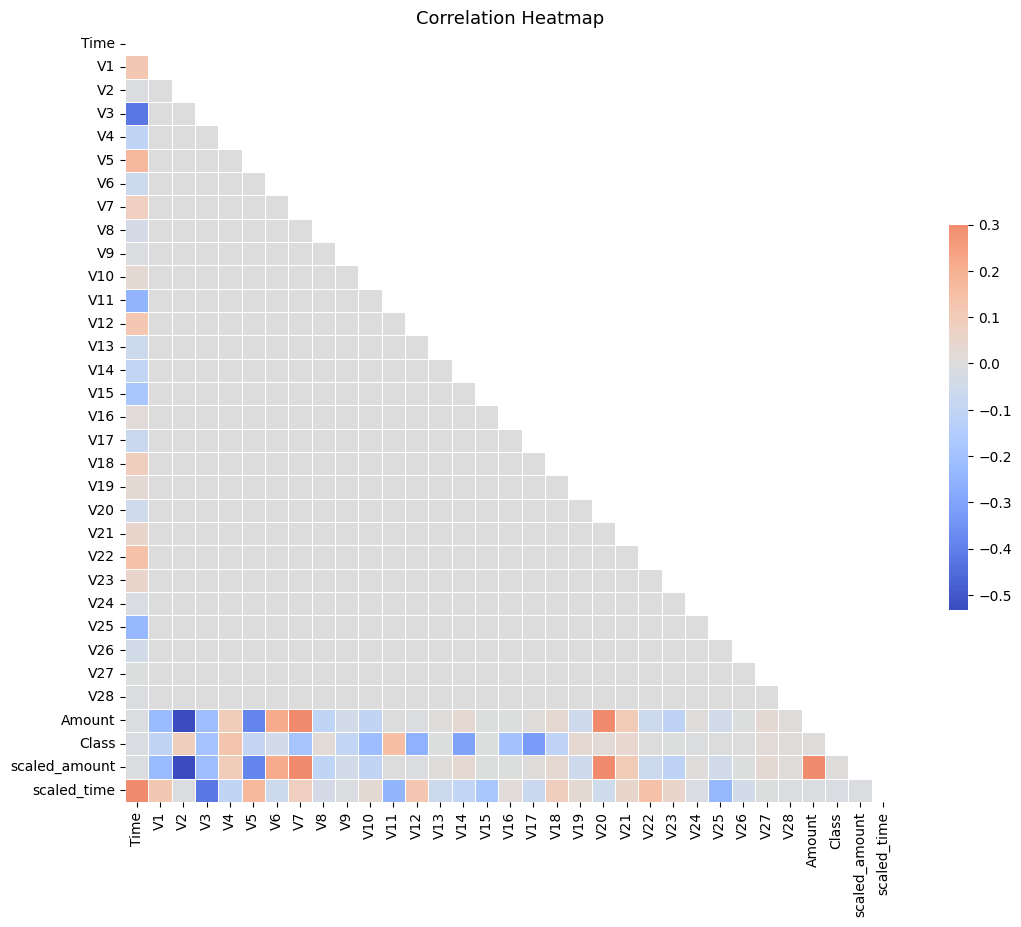

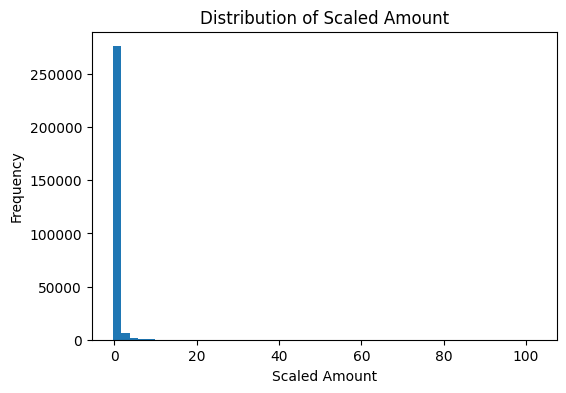

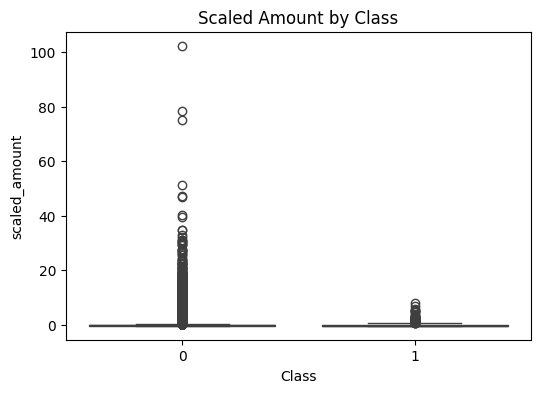

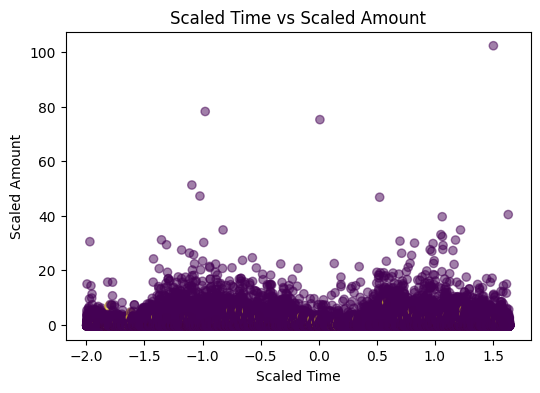

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns

df = pd.read_csv("creditcard.csv")

print(df.isnull().sum())
df.describe()

scaler = StandardScaler()

df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_time'] = scaler.fit_transform(df[['Time']])

X = df.drop(['Time', 'Amount', 'Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=256,
    validation_data=(X_test, y_test)
)

results = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", results[1])
print("Test AUC:", results[2])

y_prob = model.predict(X_test).ravel()

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision–Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()

THRESHOLD = 1.00
y_pred = (y_prob >= THRESHOLD).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
precision_val = precision_score(y_test, y_pred)
recall_val = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label="ANN")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap', fontsize=13)
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['scaled_amount'], bins=50)
plt.title("Distribution of Scaled Amount")
plt.xlabel("Scaled Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Class'], y=df['scaled_amount'])
plt.title("Scaled Amount by Class")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df['scaled_time'], df['scaled_amount'], c=df['Class'], alpha=0.5)
plt.title("Scaled Time vs Scaled Amount")
plt.xlabel("Scaled Time")
plt.ylabel("Scaled Amount")
plt.show()